In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('iris-dataset.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
cols = df.columns
cols

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

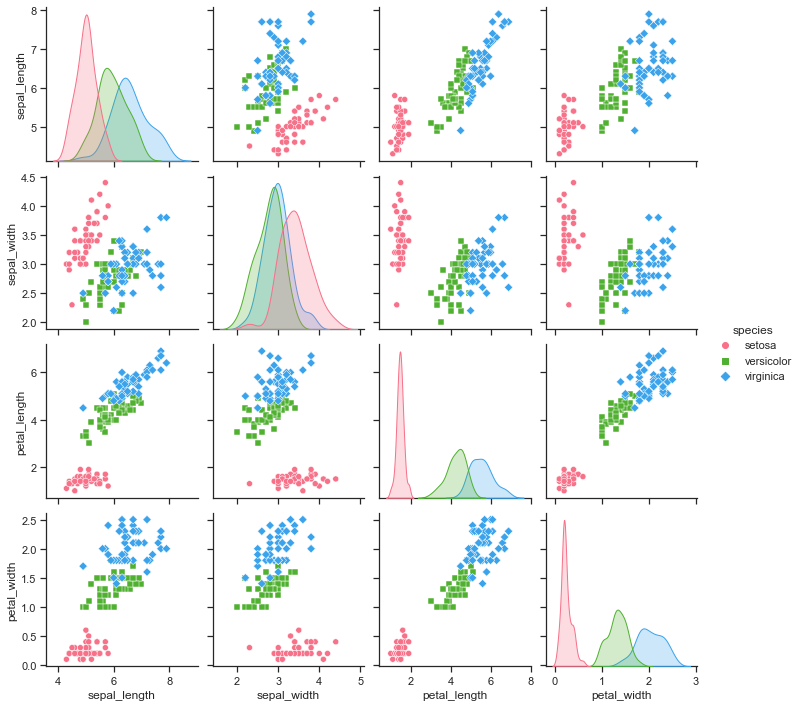

In [10]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, hue="species", palette="husl", markers=["o", "s", "D"])

In [12]:
X = df.iloc[:, :4].values
y = df.iloc[:, -1].values

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [15]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()   
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [17]:
prediction = model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,prediction)

1.0

In [26]:
target = list(df['species'].unique())
feature_names = list(cols[:-1])
target, feature_names

(['setosa', 'versicolor', 'virginica'],
 ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

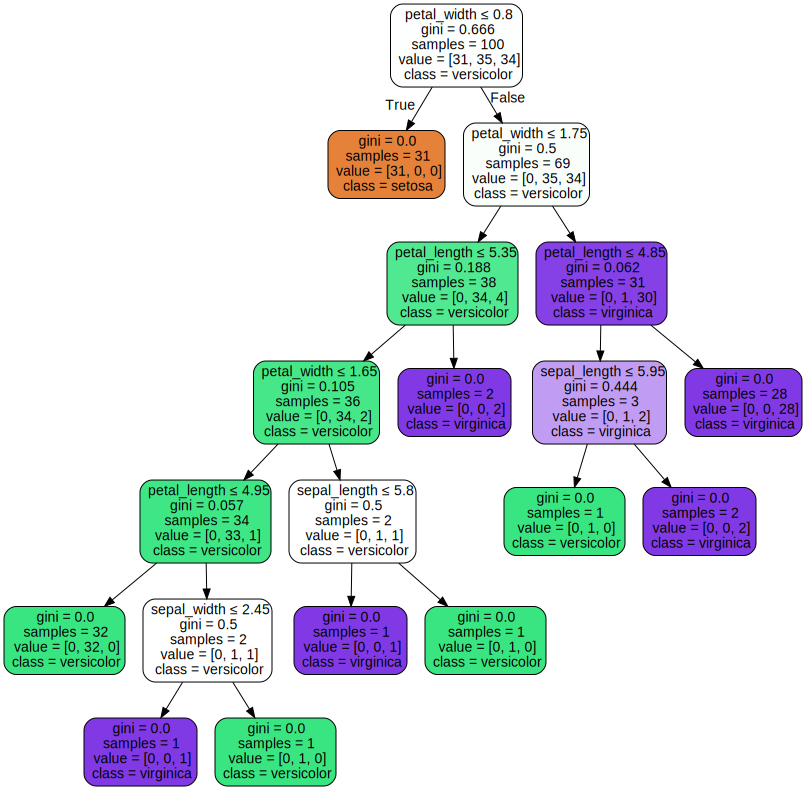

In [23]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf_model,
                                out_file=None, 
                      feature_names=feature_names,  
                      class_names=target,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

graph

In [27]:
from sklearn.tree import export_text
r = export_text(model, feature_names=feature_names)
r

'|--- petal_width <= 0.80\n|   |--- class: setosa\n|--- petal_width >  0.80\n|   |--- petal_width <= 1.75\n|   |   |--- petal_length <= 5.35\n|   |   |   |--- petal_width <= 1.65\n|   |   |   |   |--- petal_length <= 4.95\n|   |   |   |   |   |--- class: versicolor\n|   |   |   |   |--- petal_length >  4.95\n|   |   |   |   |   |--- petal_width <= 1.55\n|   |   |   |   |   |   |--- class: virginica\n|   |   |   |   |   |--- petal_width >  1.55\n|   |   |   |   |   |   |--- class: versicolor\n|   |   |   |--- petal_width >  1.65\n|   |   |   |   |--- sepal_length <= 5.80\n|   |   |   |   |   |--- class: virginica\n|   |   |   |   |--- sepal_length >  5.80\n|   |   |   |   |   |--- class: versicolor\n|   |   |--- petal_length >  5.35\n|   |   |   |--- class: virginica\n|   |--- petal_width >  1.75\n|   |   |--- petal_length <= 4.85\n|   |   |   |--- sepal_length <= 5.95\n|   |   |   |   |--- class: versicolor\n|   |   |   |--- sepal_length >  5.95\n|   |   |   |   |--- class: virginica\n

In [29]:
graph.save('graph1.png')

'graph1.png'